In [2]:
import sys
sys.path.append('../')

In [3]:
from data.cosem_jrc_hela_rawdata import load_jrc_hela_rawdata
raw_datafpath = '/group/jug/ashesh/bleedthroughsimulation/jrc_hela-3/jrc_hela-3/jrc_hela-3_bleedthrough_EGFP_Venus_R3.0-3.0_S4_D1_Ex100.0ms.tif'
data = load_jrc_hela_rawdata(raw_datafpath)



(96, 2, 2800, 2800) (96, 2800, 2800) (96, 2800, 2800)


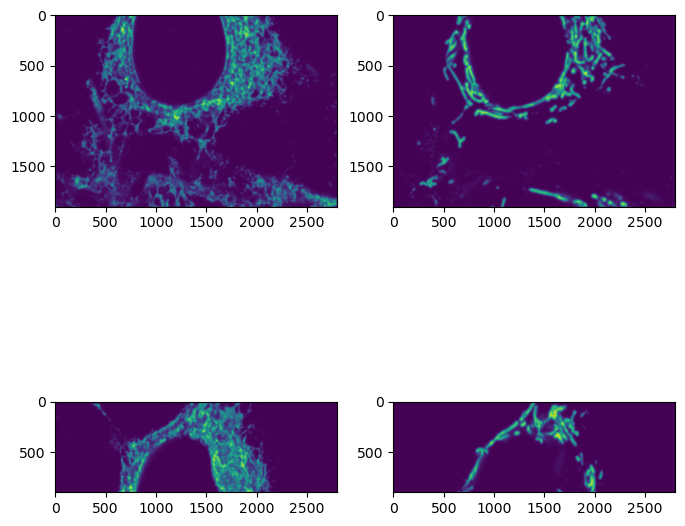

In [12]:
import matplotlib.pyplot as plt
_,ax = plt.subplots(figsize=(8,8),ncols=2,nrows=2)
idx = 0
thresh = 900
ax[0,0].imshow(data[idx,thresh:,:,0])
ax[0,1].imshow(data[idx,thresh:,:,1])

ax[1,0].imshow(data[idx,:thresh,:,0])
ax[1,1].imshow(data[idx,:thresh,:,1])


In [13]:
data[...,0].min(),data[...,0].max(),data[...,1].min(),data[...,1].max()

(97, 741, 97, 905)

In [15]:
outputdir = '/group/jug/ashesh/bleedthroughsimulation/jrc_hela-3/train-val-test-split/'

In [16]:
from disentangle.core.tiff_reader import save_tiff
import os

train_data = data[:,thresh:]
val_data =  data[:,:thresh,:1400]
test_data = data[:,:thresh,1400:]
# train_data = data[:,thresh:]
# val_data = data[:,:thresh,:1400]
# test_data =data[:,:thresh,1400:]

print(train_data.shape, val_data.shape, test_data.shape)
raw_datafname = os.path.basename(raw_datafpath)
train_fpath = os.path.join(outputdir,f'train_{raw_datafname}')
save_tiff(train_fpath,train_data)
save_tiff(os.path.join(outputdir,f'val_{raw_datafname}'),val_data)
save_tiff(os.path.join(outputdir,f'test_{raw_datafname}'),test_data)
print(train_fpath)


(96, 1900, 2800, 3) (96, 900, 1400, 3) (96, 900, 1400, 3)


/home/ashesh.ashesh/code/Disentangle/disentangle/core/tiff_reader.py:14: UserWarning: /group/jug/ashesh/bleedthroughsimulation/jrc_hela-3/train-val-test-split/train_jrc_hela-3_bleedthrough_EGFP_Venus_R3.0-3.0_S4_D1_Ex100.0ms.tif is a low contrast image
  imsave(path, data, plugin='tifffile')
/home/ashesh.ashesh/code/Disentangle/disentangle/core/tiff_reader.py:14: UserWarning: /group/jug/ashesh/bleedthroughsimulation/jrc_hela-3/train-val-test-split/val_jrc_hela-3_bleedthrough_EGFP_Venus_R3.0-3.0_S4_D1_Ex100.0ms.tif is a low contrast image
  imsave(path, data, plugin='tifffile')
/home/ashesh.ashesh/code/Disentangle/disentangle/core/tiff_reader.py:14: UserWarning: /group/jug/ashesh/bleedthroughsimulation/jrc_hela-3/train-val-test-split/test_jrc_hela-3_bleedthrough_EGFP_Venus_R3.0-3.0_S4_D1_Ex100.0ms.tif is a low contrast image
  imsave(path, data, plugin='tifffile')


/group/jug/ashesh/bleedthroughsimulation/jrc_hela-3/train-val-test-split/train_jrc_hela-3_bleedthrough_EGFP_Venus_R3.0-3.0_S4_D1_Ex100.0ms.tif
